## Restaurant orders

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('restaurant_orders.csv')

df.head()

,Order ID,Customer Name,Food Item,Category,Quantity,Price,Payment Method,Order Time
0,2268,Mary Vega DDS,Pasta,Main,5,16.52,Cash,2025-02-02 14:28:41
1,3082,Brandon Myers,Brownie,Dessert,4,17.27,Debit Card,2025-06-08 10:57:47
2,3160,Margaret Wells,Pasta,Main,1,3.37,Credit Card,2025-03-04 07:41:41
3,1272,Michael Matthews,Pasta,Main,5,2.20,Online Payment,2025-05-15 12:43:45
4,9447,Connor Williams,Soup,Starter,1,12.23,Cash,2025-03-15 14:25:56


In [2]:
# Basice Information about the dataset, datatypes and null-values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        500 non-null    int64  
 1   Customer Name   500 non-null    object 
 2   Food Item       500 non-null    object 
 3   Category        500 non-null    object 
 4   Quantity        500 non-null    int64  
 5   Price           500 non-null    float64
 6   Payment Method  500 non-null    object 
 7   Order Time      500 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 31.4+ KB


In [4]:
# Extract date and time data to simplify subsequent work.

df['Order Time'] = df['Order Time'].astype('datetime64[ns]')

df['Date'] = df['Order Time'].dt.date
df['Hour'] = df['Order Time'].dt.time
df['Precise Hour'] = df['Order Time'].dt.hour
df['Day Name'] = df['Order Time'].dt.day_name()
df['Month Name'] = df['Order Time'].dt.month_name()

df.head()

,Order ID,Customer Name,Food Item,Category,Quantity,Price,Payment Method,Order Time,Date,Hour,Precise Hour,Day Name,Month Name
0,2268,Mary Vega DDS,Pasta,Main,5,16.52,Cash,2025-02-02 14:28:41,2025-02-02,14:28:41,14,Sunday,February
1,3082,Brandon Myers,Brownie,Dessert,4,17.27,Debit Card,2025-06-08 10:57:47,2025-06-08,10:57:47,10,Sunday,June
2,3160,Margaret Wells,Pasta,Main,1,3.37,Credit Card,2025-03-04 07:41:41,2025-03-04,07:41:41,7,Tuesday,March
3,1272,Michael Matthews,Pasta,Main,5,2.20,Online Payment,2025-05-15 12:43:45,2025-05-15,12:43:45,12,Thursday,May
4,9447,Connor Williams,Soup,Starter,1,12.23,Cash,2025-03-15 14:25:56,2025-03-15,14:25:56,14,Saturday,March


In [5]:
# How many different customers have placed orders so far? 

print('So far there have been ' + str(df['Customer Name'].nunique()) + ' customers.')

So far there have been 497 customers.


In [6]:
# What is the most popular name among customers at this restaurant?

names_list = df['Customer Name'].str.split(" ").str[0]
print('The most popular name among costumers at this restaurant is ' + names_list.value_counts().idxmax() + '.')

The most popular name among costumers at this restaurant is James.


In [7]:
# Dividing the times in such a way that we can observe the data regarding the meals eaten during the day

def get_meal(hour):
    if 5 <= hour <= 8:
        return "Breakfast"
    elif 12 <= hour <= 14:
        return "Lunch"
    elif 19 <= hour <= 21:
        return "Dinner"
    else:
        return "Snack"

df['Meal'] = df['Precise Hour'].apply(get_meal)
df['Meal'].value_counts()

Meal
Snack        261
Breakfast     93
Lunch         86
Dinner        60
Name: count, dtype: int64

In [8]:
# What are the most ordered foods per meal on different days of the week?

order_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

cat_per_day = df.pivot_table(
    index='Meal',
    columns='Day Name',
    values='Category',
    aggfunc=lambda x: x.mode().iloc[0] if not x.mode().empty else None
)

cat_per_day = cat_per_day.reindex(columns=order_day)
cat_per_day

Day Name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Meal,,,,,,,
Breakfast,Main,Dessert,Dessert,Starter,Starter,Dessert,Dessert
Dinner,Main,Dessert,Starter,Dessert,Dessert,Starter,Dessert
Lunch,Starter,Dessert,Dessert,Starter,Main,Starter,Main
Snack,Main,Main,Main,Dessert,Main,Starter,Dessert


In [9]:
food_per_day = df.pivot_table(
    index='Meal',
    columns='Day Name',
    values='Food Item',
    aggfunc=lambda x: x.mode().iloc[0] if not x.mode().empty else None
)

food_per_day = food_per_day.reindex(columns=order_day)
food_per_day

Day Name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Meal,,,,,,,
Breakfast,Burger,Ice Cream,Brownie,Soup,Fries,Brownie,Ice Cream
Dinner,Pasta,Pizza,Salad,Brownie,Ice Cream,Brownie,Cake
Lunch,Fries,Ice Cream,Brownie,Fries,Burger,Cake,Pizza
Snack,Pizza,Pizza,Pasta,Burger,Pizza,Pizza,Cake


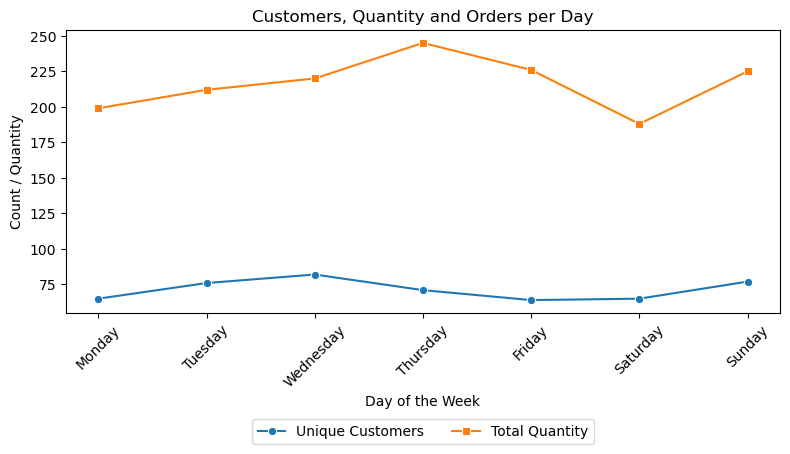

In [10]:
# Is there a correlation between the number of customers and the number of orders?

# Group by Day Name and aggregate
summary = df.groupby('Day Name').agg(
    unique_customers=('Customer Name', 'nunique'),  
    total_quantity=('Quantity', 'sum')      
).reset_index()

# Order the days
order_day = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
summary['Day Name'] = pd.Categorical(summary['Day Name'], categories=order_day, ordered=True)

# Line plot
plt.figure(figsize=(8,5))
sns.lineplot(data=summary, x='Day Name', y='unique_customers', marker='o', label='Unique Customers')
sns.lineplot(data=summary, x='Day Name', y='total_quantity', marker='s', label='Total Quantity')

plt.title('Customers, Quantity and Orders per Day')
plt.ylabel('Count / Quantity')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.35), ncol=2)
plt.tight_layout()
plt.show()

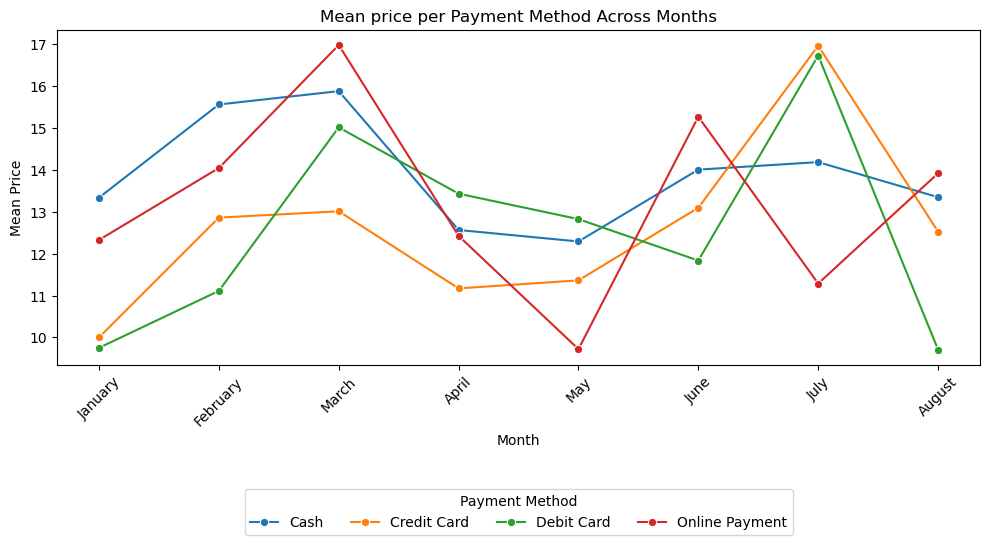

In [11]:
summary = df.groupby(['Month Name', 'Payment Method']).agg(  
    mean_price=('Price', 'mean')      
).reset_index()

month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

summary['Month Name'] = pd.Categorical(summary['Month Name'], categories=month_order, ordered=True)

plt.figure(figsize=(10,6))
sns.lineplot(data=summary, x='Month Name', y='mean_price', hue='Payment Method', marker='o')

plt.title('Mean price per Payment Method Across Months')
plt.xlabel('Month')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.legend(title='Payment Method', loc='upper center', bbox_to_anchor=(0.5, -0.35), ncol=4)
plt.tight_layout()
plt.show()

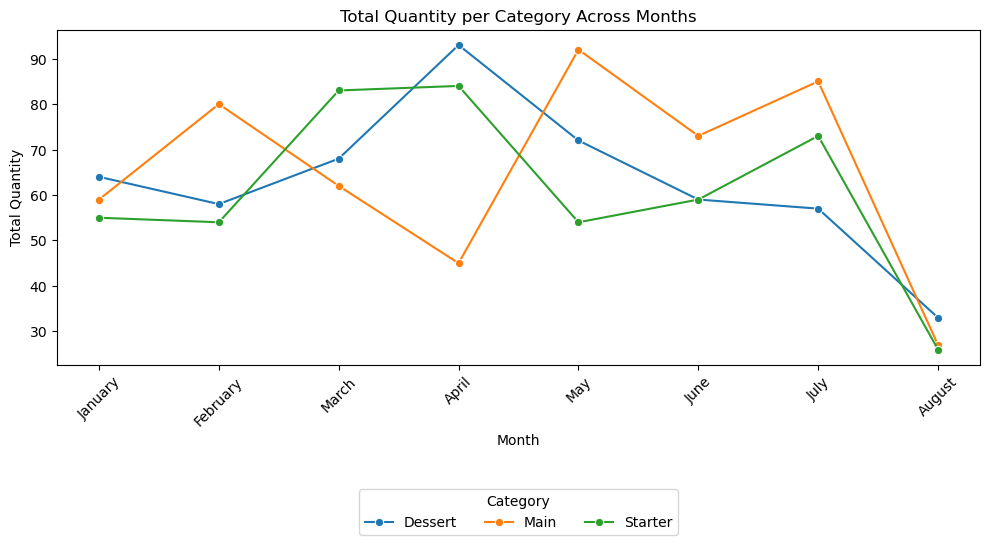

In [13]:
summary = df.groupby(['Month Name', 'Category']).agg(  
    total_quantity=('Quantity', 'sum')      
).reset_index()

month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

summary['Month Name'] = pd.Categorical(summary['Month Name'], categories=month_order, ordered=True)

plt.figure(figsize=(10,6))
sns.lineplot(data=summary, x='Month Name', y='total_quantity', hue='Category', marker='o')

plt.title('Total Quantity per Category Across Months')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.legend(title='Category', loc='upper center', bbox_to_anchor=(0.5, -0.35), ncol=4)
plt.tight_layout()
plt.show()
